# Clustering jerárquico y dendogramas

Vamos a anotar un poco antes para saber de que hablamos

+ X dataset ( array de n x m de puntos a clusterizar
+ n número de datos
+ m núrmero de rasgos
+ Z array de enlaces del cluster con la información de las uniones
+ k número de clusters

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


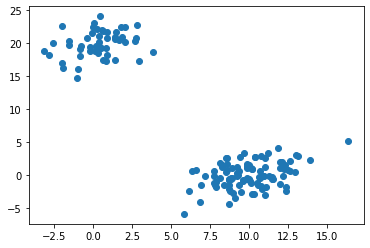

In [4]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])

In [5]:
Z = linkage(X, "ward")
Z[:50]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [8]:
#Aquí podemos ver los cluster que ha unido son el primero y segundo los que ha unido,
#que cercanía tienen y cuantos cluster ha unido
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [9]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [10]:
print(Z[152-len(X)])#cluster 152
print(Z[158-len(X)])#cluster 158
print(Z[167-len(X)])#cluster 167

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]
[39.         88.          0.20628285  2.        ]


In [11]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

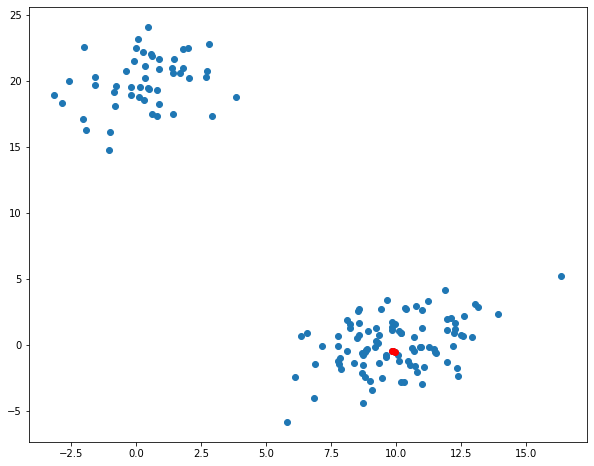

In [12]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])#pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')


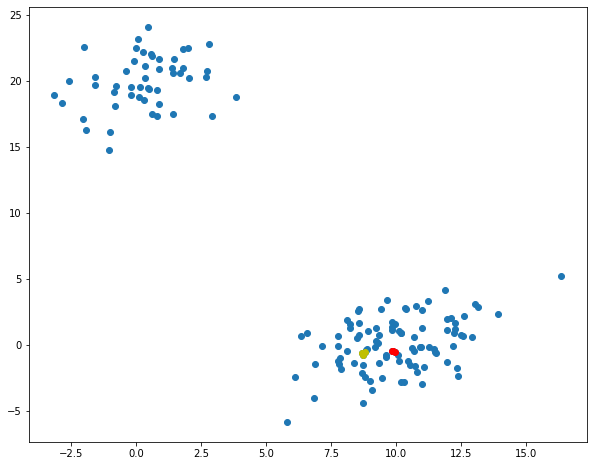

In [13]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])#pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')#destacampos en rojo los puntos que nos interesa
plt.scatter(X[idx2,0], X[idx2,1], c='y')#destacamos en amarillo el segundo cluster
plt.show()

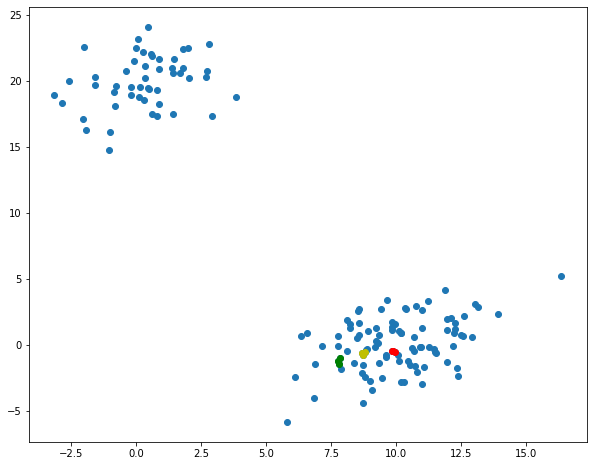

In [14]:
idx = [33,62,68]
idx2 = [15,69,41]
idx3 = [39,26,88]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])#pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')#destacampos en rojo los puntos que nos interesa
plt.scatter(X[idx2,0], X[idx2,1], c='y')#destacamos en amarillo el segundo cluster
plt.scatter(X[idx3,0], X[idx3,1], c='g')#destacamos en verde el terce cluster
plt.show()

### Representación gráfica de un dendrograma

<function matplotlib.pyplot.show(*args, **kw)>

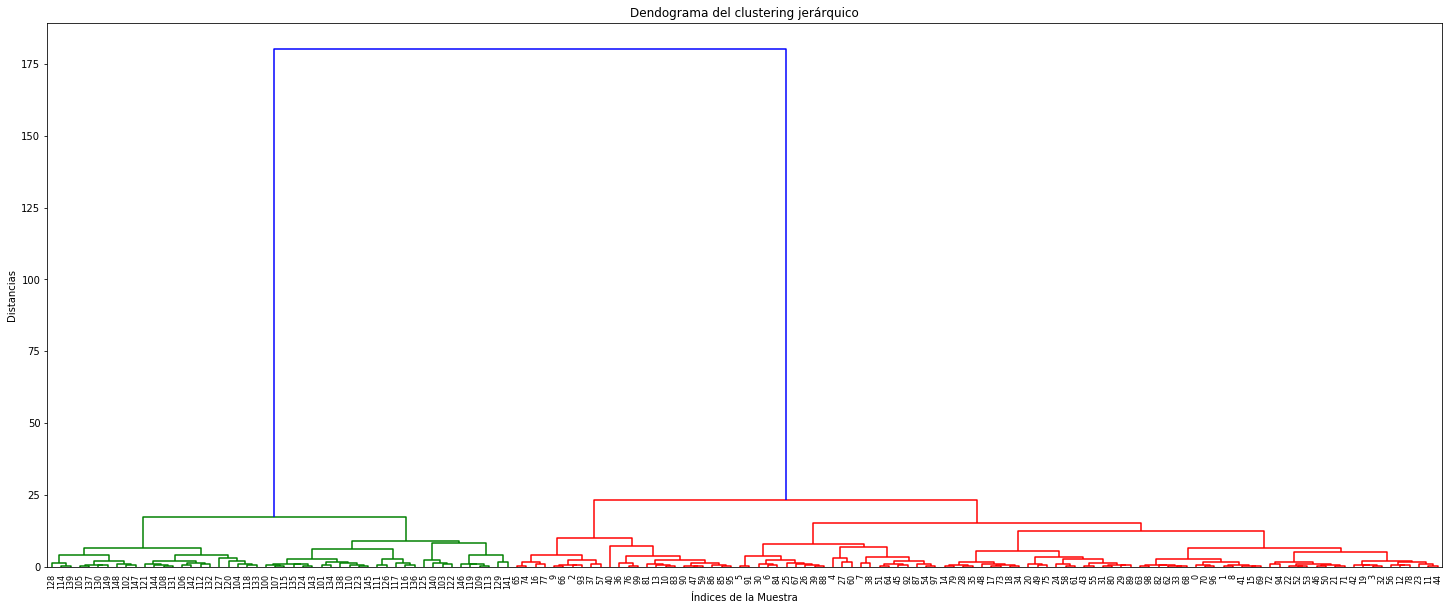

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)#lable= -> puedes escribir el nomnbre de cada cluster
plt.show

In [16]:
Z[-4:]#Aquí sacamos los últimos 4 y nos dice en la tercera columna

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

## Truncar el dendrograma

<function matplotlib.pyplot.show(*args, **kw)>

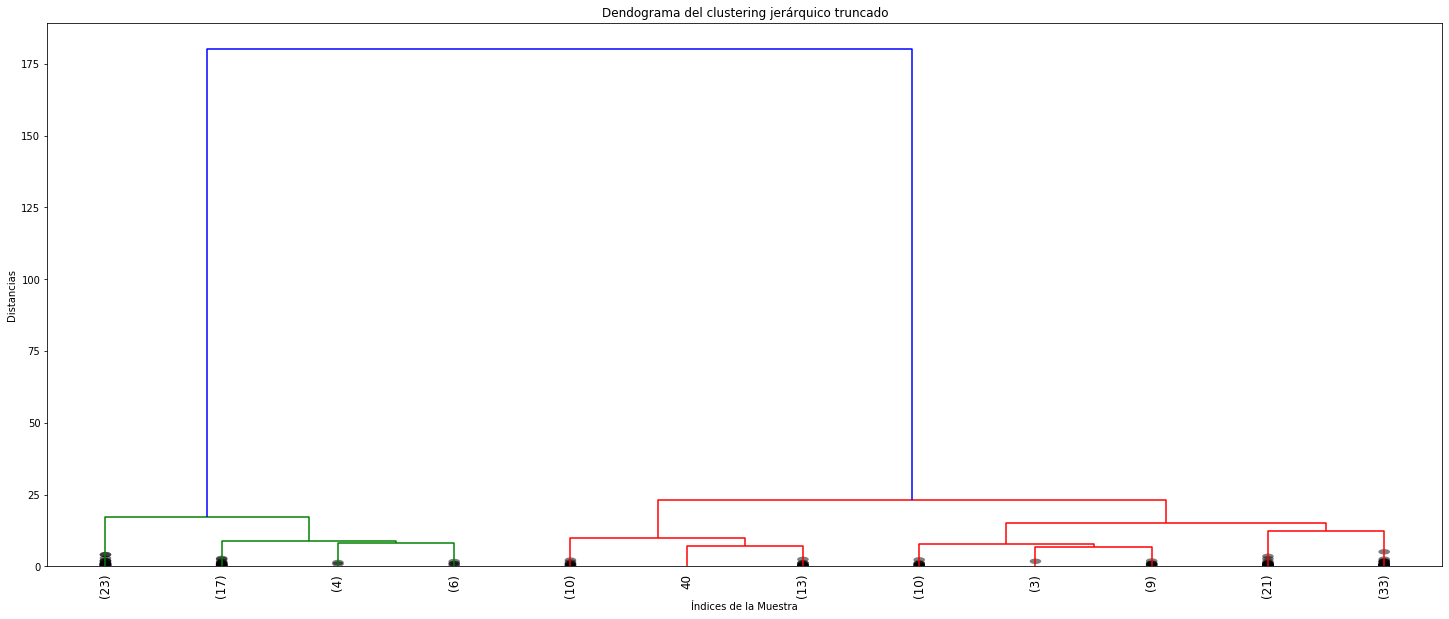

In [17]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)#lable= -> puedes escribir el nomnbre de cada cluster
plt.show

### Dendograma tuneado

In [18]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata= dendrogram(*args,**kwargs)
    print(ddata)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Ïndice del Dataset (o bien tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    
    return ddata
        

{'icoord': [[25.0, 25.0, 35.0, 35.0], [15.0, 15.0, 30.0, 30.0], [5.0, 5.0, 22.5, 22.5], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [105.0, 105.0, 115.0, 115.0], [82.5, 82.5, 110.0, 110.0], [52.5, 52.5, 96.25, 96.25], [13.75, 13.75, 74.375, 74.375]], 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0], [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103], [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588], [0.0, 7.11106083424195, 7.11106083424195, 0.0], [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195], [0.0, 6.65621608856717, 6.65621608856717, 0.0], [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717], [0.0, 12.42734657224792, 12.42734657224792, 0.0], [7.868785423127422, 15.115331182663091, 15.115331182663091, 12.42734657224792], [9.844278294486319, 23.121989355286757, 23.121989355286757, 15.115331182663091], [17.11527361712349, 180.27043021047612, 180.27043021047612, 23.1219

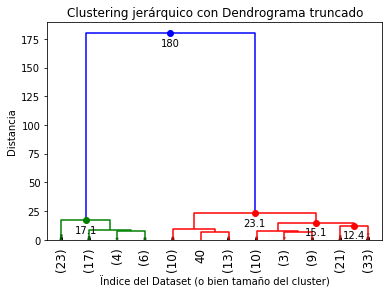

In [19]:
dendrogram_tune(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True, annotate_above= 10)
plt.show()

### Corte automático del dendrograma
incosistencia_i = (h_i-avg(h_j))/std(h_j)

In [20]:
from scipy.cluster.hierarchy import inconsistent

In [21]:
#Este tiene el fallo de que le metemos nosotros a mano la profunidad y más sin haberlo calculado
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Metodo del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


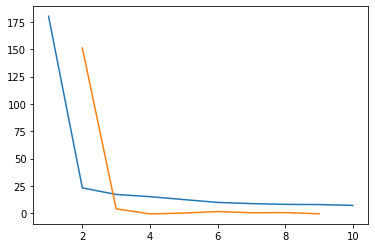

El número óptimo de clasters es: 2


In [22]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de clasters es: %s" %str(k))

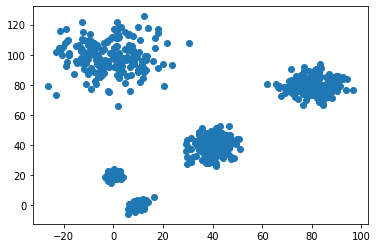

In [23]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size = [200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [64]:
Z2 = linkage(X2, "ward")

{'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [30.0, 30.0, 52.5, 52.5], [10.0, 10.0, 41.25, 41.25], [75.0, 75.0, 85.0, 85.0], [25.625, 25.625, 80.0, 80.0], [95.0, 95.0, 105.0, 105.0], [125.0, 125.0, 135.0, 135.0], [115.0, 115.0, 130.0, 130.0], [145.0, 145.0, 155.0, 155.0], [122.5, 122.5, 150.0, 150.0], [100.0, 100.0, 136.25, 136.25], [185.0, 185.0, 195.0, 195.0], [175.0, 175.0, 190.0, 190.0], [165.0, 165.0, 182.5, 182.5], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [173.75, 173.75, 212.5, 212.5], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [265.0, 265.0, 275.0, 275.0], [285.0, 285.0, 295.0, 295.0], [270.0, 270.0, 290.0, 290.0], [242.5, 242.5, 280.0, 280.0], [193.125, 193.125, 261.25, 261.25], [118.125, 118.125, 227.1875, 227.1875], [52.8125, 52.8125, 172.65625, 172.65625]], 'dcoord': [[0.0, 35.268965249328666, 35.268965249328666, 0.0], [0.0, 28.220446666536656, 28.220446666536656, 0.0], 

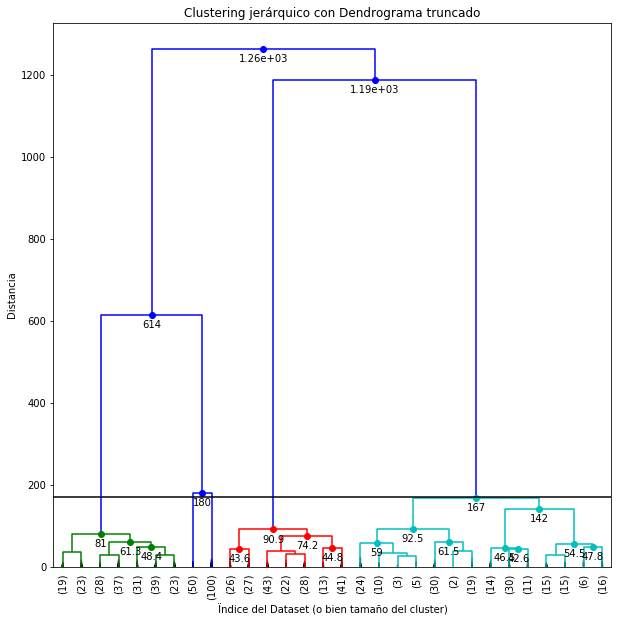

In [66]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size= 10.,
    show_contracted=True,
    annotate_above=40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


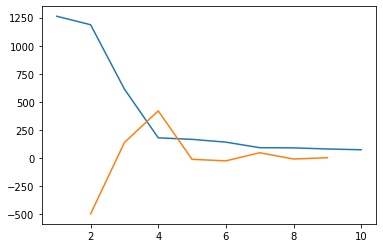

El número óptimo de clasters es: 4


In [60]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de clasters es: %s" %str(k))

In [27]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


## Recuperar los clusters y sus elementos

In [28]:
from scipy.cluster.hierarchy import fcluster

In [73]:
max_d=20
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [74]:
k=3
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [75]:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

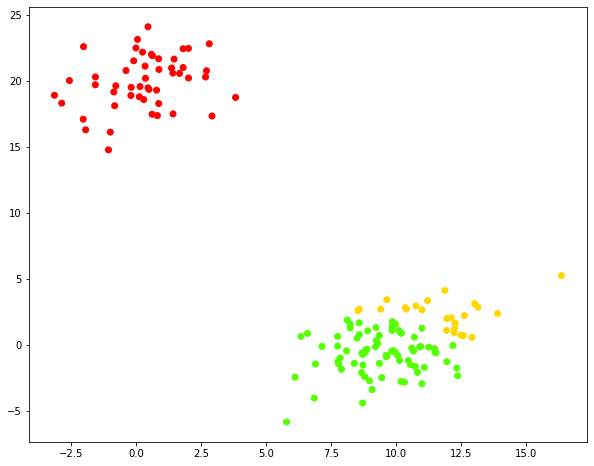

In [76]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

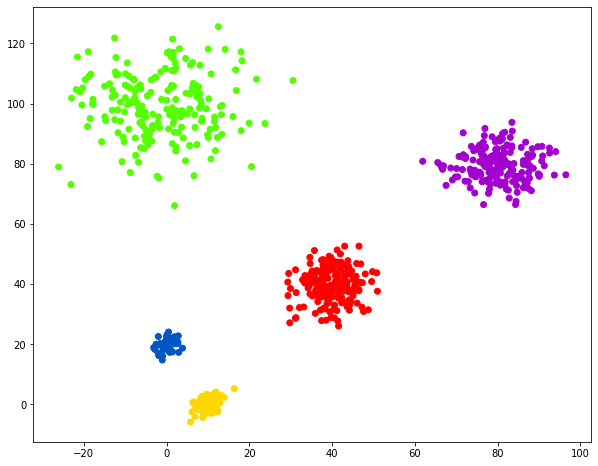

In [78]:
max_d=170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10, 8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()